In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Load the datasets
books = pd.read_csv('Books.csv', encoding='latin1')
ratings = pd.read_csv('Ratings.csv', encoding='latin1')
users = pd.read_csv('Users.csv', encoding='latin1')

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# Check basic info about the datasets
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
# Basic statistics
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,13903,7535,2,2,2


In [11]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [12]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


## **Cleaning and Processing**

In [13]:
# Check for missing value
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [16]:
# Check for duplicates
books.duplicated().sum()

np.int64(0)

In [17]:
ratings.duplicated().sum()

np.int64(0)

In [18]:
users.duplicated().sum()

np.int64(0)

In [19]:
# Drop rows with missing or irrelevant data in the Ratings and Books datasets
ratings.dropna(subset=['User-ID', 'ISBN', 'Book-Rating'], inplace=True)
books.dropna(subset=['ISBN', 'Book-Title'], inplace=True)

In [20]:
# Handle missing or inconsistent User Age in Users dataset
users['Age'].fillna(users['Age'].median(), inplace=True)
users['Age'] = users['Age'].apply(lambda x: x if 5 <= x <= 100 else users['Age'].median())

In [21]:
# Filter books with less than 50 ratings
book_rating_counts = ratings['ISBN'].value_counts()
popular_books = book_rating_counts[book_rating_counts >= 50].index
filtered_ratings = ratings[ratings['ISBN'].isin(popular_books)]

In [22]:
# Filter users who have rated fewer than 10 books
user_rating_counts = filtered_ratings['User-ID'].value_counts()
active_users = user_rating_counts[user_rating_counts >= 10].index
filtered_ratings = filtered_ratings[filtered_ratings['User-ID'].isin(active_users)]

In [23]:
filtered_ratings.shape

(159397, 3)

In [24]:
# Merge filtered ratings with books and users for a clean dataset
merged_df = filtered_ratings.merge(books, on='ISBN').merge(users, on='User-ID')

In [25]:
merged_df.shape

(158283, 12)

In [26]:
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,277042,0060505885,0,The Scandalous Summer of Sissy LeBlanc : A Novel,Loraine Despres,2002,Perennial,http://images.amazon.com/images/P/0060505885.0...,http://images.amazon.com/images/P/0060505885.0...,http://images.amazon.com/images/P/0060505885.0...,"hiram, georgia, usa",32.0
1,277042,0061097101,0,The Saving Graces: A Novel,Patricia Gaffney,2000,HarperTorch,http://images.amazon.com/images/P/0061097101.0...,http://images.amazon.com/images/P/0061097101.0...,http://images.amazon.com/images/P/0061097101.0...,"hiram, georgia, usa",32.0
2,277042,0312283709,8,Running with Scissors,Augusten Burroughs,2002,St. Martin's Press,http://images.amazon.com/images/P/0312283709.0...,http://images.amazon.com/images/P/0312283709.0...,http://images.amazon.com/images/P/0312283709.0...,"hiram, georgia, usa",32.0
3,277042,0312983271,0,Full House (Janet Evanovich's Full Series),Janet Evanovich,2002,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312983271.0...,http://images.amazon.com/images/P/0312983271.0...,http://images.amazon.com/images/P/0312983271.0...,"hiram, georgia, usa",32.0
4,277042,0380731851,0,Mystic River,Dennis Lehane,2002,HarperTorch,http://images.amazon.com/images/P/0380731851.0...,http://images.amazon.com/images/P/0380731851.0...,http://images.amazon.com/images/P/0380731851.0...,"hiram, georgia, usa",32.0


## **Exploratory Data Analysis (EDA)**

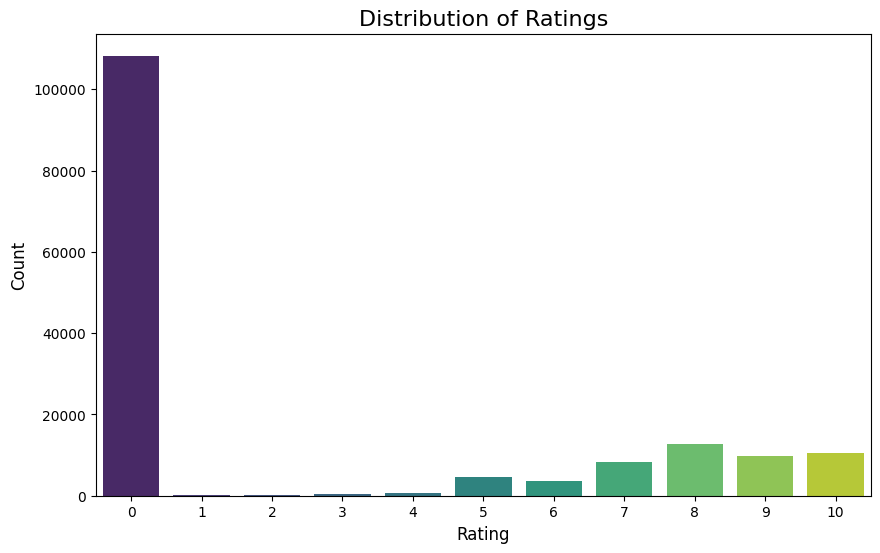

In [27]:
import seaborn as sns

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_ratings, x='Book-Rating', palette='viridis')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [28]:
# Top 10 Most Rated Books
top_books = filtered_ratings['ISBN'].value_counts().head(10).index
top_books_df = merged_df[merged_df['ISBN'].isin(top_books)][['Book-Title', 'Book-Author']].drop_duplicates()
top_books_df

,Book-Title,Book-Author
12,Wild Animus,Rich Shapero
16,The Lovely Bones: A Novel,Alice Sebold
45,The Red Tent (Bestselling Backlist),Anita Diamant
70,The Secret Life of Bees,Sue Monk Kidd
106,The Da Vinci Code,Dan Brown
283,A Time to Kill,JOHN GRISHAM
286,The Pelican Brief,John Grisham
416,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
629,The Firm,John Grisham
994,Snow Falling on Cedars,David Guterson


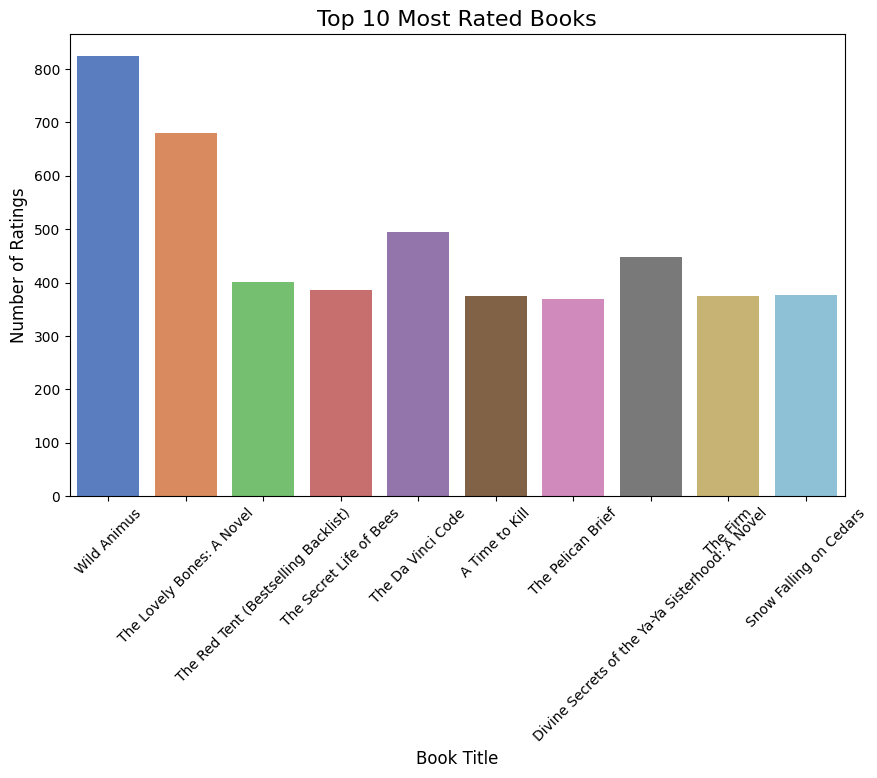

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df[merged_df['ISBN'].isin(top_books)], x='Book-Title', y='Book-Rating', estimator=len, ci=None, palette='muted')
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [30]:
# Most Active Users
active_users = filtered_ratings['User-ID'].value_counts().head(10)
active_users

User-ID
11676     1583
35859      746
76352      680
16795      608
153662     562
102967     528
55492      513
78783      491
232131     487
198711     474
Name: count, dtype: int64

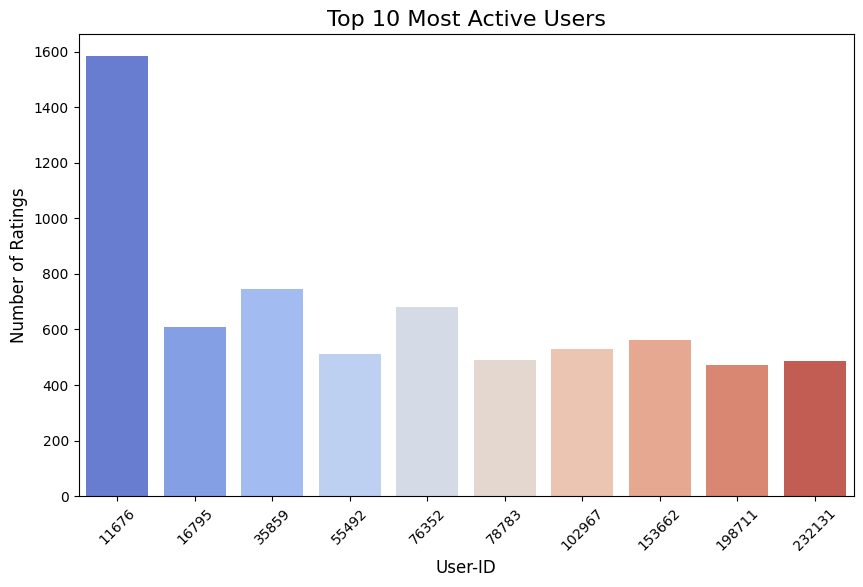

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=active_users.index, y=active_users.values, palette='coolwarm')
plt.title('Top 10 Most Active Users', fontsize=16)
plt.xlabel('User-ID', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.show()

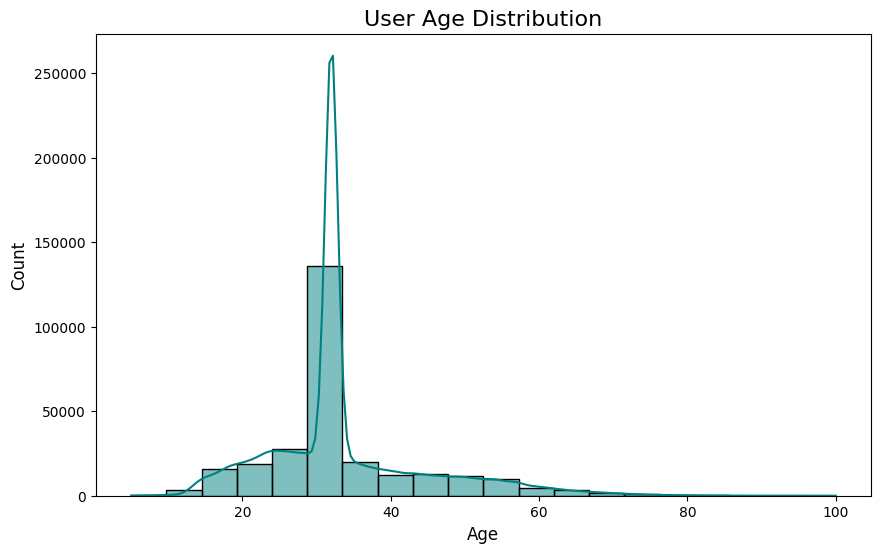

In [32]:
# User Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], bins=20, kde=True, color='teal')
plt.title('User Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## **Popularity-Based Recommender System**

In [33]:
# Calculate number of ratings and average rating for each book
popular_books = merged_df.groupby('Book-Title').agg({'Book-Rating': ['count', 'mean']}).reset_index()


In [34]:
# Rename columns for easier reference
popular_books.columns = ['Book-Title', 'num_ratings', 'avg_rating']

In [35]:
# Filter books with at least 50 ratings and sort by average rating
popular_books = popular_books[popular_books['num_ratings'] >= 50].sort_values(
    by=['avg_rating', 'num_ratings'], ascending=False
).head(10)
popular_books

,Book-Title,num_ratings,avg_rating
624,Harry Potter and the Goblet of Fire (Book 4),252,5.678571
627,Harry Potter and the Sorcerer's Stone (Book 1),170,5.594118
626,Harry Potter and the Prisoner of Azkaban (Book 3),277,5.581227
625,Harry Potter and the Order of the Phoenix (Boo...,226,5.420354
623,Harry Potter and the Chamber of Secrets (Book 2),335,5.089552
470,Ender's Game (Ender Wiggins Saga (Paperback)),106,5.056604
1577,"The Lion, the Witch, and the Wardrobe (The Chr...",50,5.040000
1425,The Curious Incident of the Dog in the Night-T...,62,4.645161
345,Coraline,116,4.560345
1471,The Fellowship of the Ring (The Lord of the Ri...,186,4.521505


In [36]:
# Merge to get additional details like author and cover image
popular_books_details = popular_books.merge(books, on='Book-Title')[['Book-Title', 'Book-Author', 'avg_rating', 'num_ratings', 'Image-URL-M']]
popular_books_details

,Book-Title,Book-Author,avg_rating,num_ratings,Image-URL-M
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,5.678571,252,http://images.amazon.com/images/P/0439139597.0...
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,5.678571,252,http://images.amazon.com/images/P/0439139600.0...
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,5.594118,170,http://images.amazon.com/images/P/0590353403.0...
3,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,5.594118,170,http://images.amazon.com/images/P/043936213X.0...
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,5.594118,170,http://images.amazon.com/images/P/043920352X.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,5.594118,170,http://images.amazon.com/images/P/043936213X.0...
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.581227,277,http://images.amazon.com/images/P/0439136350.0...
7,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.581227,277,http://images.amazon.com/images/P/0439136369.0...
8,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.581227,277,http://images.amazon.com/images/P/0786222743.0...
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.420354,226,http://images.amazon.com/images/P/043935806X.0...


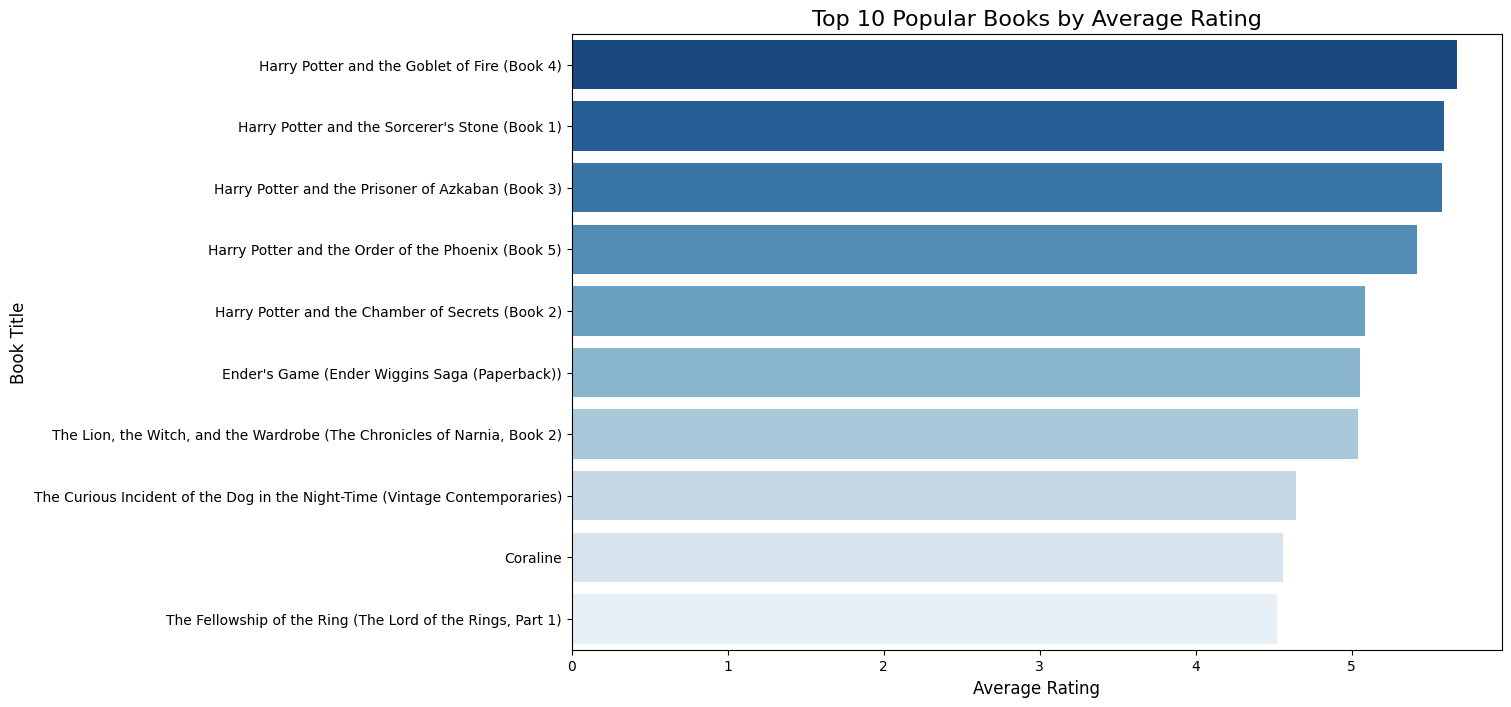

In [37]:
# Visualize the top 10 popular books
plt.figure(figsize=(12, 8))
sns.barplot(data=popular_books, x='avg_rating', y='Book-Title', palette='Blues_r')
plt.title('Top 10 Popular Books by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.show()

## **Collaborative Filtering Recommender System**

In [38]:
# Create a pivot table with users as columns and books as rows
user_item_matrix = merged_df.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [39]:
# Fill missing values with 0 (indicating no rating)
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix

User-ID,243,254,487,507,638,741,805,882,929,1025,...,278188,278194,278202,278221,278390,278418,278535,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
# Compute similarity scores
book_similarity = cosine_similarity(user_item_matrix)
book_similarity_df = pd.DataFrame(book_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
book_similarity_df.head()

Book-Title,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,50 Simple Things You Can Do to Save the Earth,...,Wuthering Heights (Penguin Classics),Wuthering Heights (Wordsworth Classics),Xenocide (Ender Wiggins Saga (Paperback)),YOU BELONG TO ME,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""",stardust
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,1.000000,0.000000,0.026796,0.121632,0.252206,0.000000,0.087535,0.106958,0.0,0.083453,...,0.0,0.000000,0.000000,0.000000,0.000000,0.072075,0.086940,0.000000,0.049406,0.000000
1984,0.000000,1.000000,0.036275,0.068470,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.053279,0.013442,0.000000,0.052760,0.000000,0.060477,0.000000,0.000000,0.049885
1st to Die: A Novel,0.026796,0.036275,1.000000,0.014259,0.000000,0.072196,0.199605,0.072884,0.0,0.023970,...,0.0,0.013592,0.000000,0.073191,0.029956,0.094636,0.027519,0.094882,0.096824,0.037089
2010: Odyssey Two,0.121632,0.068470,0.014259,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.077193,0.000000,0.027562,0.000000,0.069396,0.000000,0.000000,0.000000
204 Rosewood Lane,0.252206,0.000000,0.000000,0.000000,1.000000,0.000000,0.096889,0.148458,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
def recommend_books_cf(book_title, num_recommendations=10):
    if book_title not in book_similarity_df.index:
        return f"Book '{book_title}' not found in the dataset."

    # Get the similarity scores for the selected book
    similar_books = book_similarity_df[book_title].sort_values(ascending=False)[1:num_recommendations + 1]

    # Ensure to filter unique titles and match only top similar books
    recommendations = books[books['Book-Title'].isin(similar_books.index)].drop_duplicates('Book-Title')

    # Limit the DataFrame to match the number of recommendations
    recommendations = recommendations[['Book-Title', 'Book-Author', 'Image-URL-M']].iloc[:num_recommendations]
    recommendations['Similarity Score'] = similar_books.values[:len(recommendations)]

    return recommendations


In [45]:
# Example: Recommend books similar to 'Harry Potter and the Prisoner of Azkaban (Book 3)'
recommended_books = recommend_books_cf('Harry Potter and the Prisoner of Azkaban (Book 3)', 10)
recommended_books

,Book-Title,Book-Author,Image-URL-M,Similarity Score
1571,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,0.660217
2143,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,0.620662
2785,The Hobbit: or There and Back Again,J.R.R. Tolkien,http://images.amazon.com/images/P/0618002219.0...,0.473673
2809,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,0.463704
3459,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,0.342799
3847,Charlotte's Web (Trophy Newbery),E. B. White,http://images.amazon.com/images/P/0064400557.0...,0.171597
4665,The Reptile Room (A Series of Unfortunate Even...,Lemony Snicket,http://images.amazon.com/images/P/0064407675.0...,0.152086
5431,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,0.149265
5506,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,0.138443
34232,The Wide Window (A Series of Unfortunate Event...,Lemony Snicket,http://images.amazon.com/images/P/0064407683.0...,0.129846


## **Advanced Collaborative Filtering with Matrix Factorization**

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [47]:
# Encode User and Item IDs
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

In [48]:
ratings['User-ID'] = user_encoder.fit_transform(ratings['User-ID'])
ratings['ISBN'] = item_encoder.fit_transform(ratings['ISBN'])

In [49]:
# Prepare Data for Training
X = ratings[['User-ID', 'ISBN']].values
y = ratings['Book-Rating'].values

In [50]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Hyperparameters
num_users = ratings['User-ID'].nunique()
num_items = ratings['ISBN'].nunique()
embedding_dim = 50

In [52]:
# Input Layers
user_input = Input(shape=(1,), name='User_Input')
item_input = Input(shape=(1,), name='Item_Input')

In [53]:
# Embedding Layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User_Embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='Item_Embedding')(item_input)

In [54]:
# Flatten Embeddings
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

In [55]:
# Concatenate User and Item Embeddings
concatenated = Concatenate()([user_vec, item_vec])

In [56]:
# Neural Network Layers
dense1 = Dense(128, activation='relu')(concatenated)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)
output = Dense(1)(dropout2)


In [57]:
# Build Model
ncf_model = Model(inputs=[user_input, item_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [58]:
ncf_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ User_Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Item_Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User_Embedding      │ (None, 1, 50)     │  5,264,150 │ User_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Item_Embedding      │ (None, 1, 50)     │ 17,027,800 │ Item_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ User_Embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ Item_Embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,313,199 (85.12 MB)

 Trainable params: 22,313,199 (85.12 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the Model
history = ncf_model.fit(
    [X_train[:, 0], X_train[:, 1]], y_train,
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
    batch_size=256,
    epochs=10,
    verbose=1
)

Epoch 1/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 1078s 299ms/step - loss: 12.7903 - mae: 2.9162 - val_loss: 11.2975 - val_mae: 2.7779
Epoch 2/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 1044s 290ms/step - loss: 9.4711 - mae: 2.3357 - val_loss: 11.8560 - val_mae: 2.7468
Epoch 3/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 993s 276ms/step - loss: 7.7005 - mae: 1.9804 - val_loss: 12.4751 - val_mae: 2.6944
Epoch 4/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 933s 260ms/step - loss: 6.4804 - mae: 1.7557 - val_loss: 12.9531 - val_mae: 2.6966
Epoch 5/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 924s 257ms/step - loss: 5.6153 - mae: 1.6031 - val_loss: 13.4119 - val_mae: 2.7376
Epoch 6/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 925s 257ms/step - loss: 4.8121 - mae: 1.4637 - val_loss: 13.7340 - val_mae: 2.7316
Epoch 7/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 919s 256ms/step - loss: 4.1871 - mae: 1.3484 - val_loss: 13.9159 - val_mae: 2.7182
Epoch 8/10
3594/3594 ━━━━━━━━━━━━━━━━━━━━ 923s 257ms/step - loss: 3.7365 - mae: 1.2627 - val_loss: 14.1515 - val_mae: 2.73

In [59]:
# Evaluate Model Performance
loss, mae = ncf_model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

7187/7187 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 22.9428 - mae: 2.8661
Test Loss: 22.978376388549805, Test MAE: 2.8709969520568848


In [87]:
def recommend_books_ncf(user_id, num_recommendations=8):
    # Check if the user ID exists in the dataset
    if user_id not in user_encoder.classes_:
        return f"User ID '{user_id}' not found in the dataset."

    # Encode the user ID to match the model's input space
    user_index = user_encoder.transform([user_id])[0]

    # Generate predictions for all books
    all_books = np.arange(len(item_encoder.classes_))
    predicted_ratings = ncf_model.predict(
        [np.array([user_index] * len(all_books)), all_books], verbose=0
    ).flatten()

    # Get indices of the top N recommendations
    top_indices = predicted_ratings.argsort()[-num_recommendations:][::-1]

    # Decode book indices back to original ISBNs
    recommended_isbns = item_encoder.inverse_transform(top_indices)

    # Retrieve book details and predicted ratings
    recommendations = books[books['ISBN'].isin(recommended_isbns)].drop_duplicates()
    
    # Limit recommendations to the requested number
    recommendations = recommendations.iloc[:num_recommendations].copy()


    # Return only the specified columns
    return recommendations[['Book-Title', 'Book-Author']].reset_index(drop=True)


In [92]:
# Example: Recommend books for a specific user
recommend_books_ncf(9)

,Book-Title,Book-Author
0,"WeiÃ?Ã?er Himmel, schwarzes Eis. Ein Fall fÃ...",Stan Jones
1,And I Don't Want to Live This Life,Deborah Spungen
2,Alan Duff's Maori heroes,Alan Duff
3,"The Beasts of Barakai (The Beasts of Barakhai,...",Mickey Zucker Reichert
4,A Very Special Gift Book of Winning Thoughts: ...,Carl Mays
5,Highland Sword (Mystical Highlands),Ruth Langan
6,"Baby Scrapbooks: Ideas, Tips, and Techniques f...",Editors of Memory Makers Magazine
7,Time of Her Life,Robb F. Dew


In [77]:
def recommend_books_ncf_by_title(book_title, top_n=10):
    # Check if the book title exists in the dataset
    if book_title not in books['Book-Title'].values:
        return f"Book title '{book_title}' not found in the dataset."

    # Encode the book title
    book_index = item_encoder.transform([book_title])[0]

    # Use the trained NCF model to predict ratings for all books
    all_items = np.arange(len(item_encoder.classes_))  # All encoded item indices
    predicted_scores = ncf_model.predict([np.array([book_index] * len(all_items)), all_items])

    # Get Top N most similar books
    top_indices = predicted_scores.flatten().argsort()[-top_n:][::-1]
    recommended_items = item_encoder.inverse_transform(top_indices)

    # Retrieve book details for recommendations
    recommendations = books[books['ISBN'].isin(recommended_items)][['Book-Title', 'Book-Author']].drop_duplicates()
    recommendations['Similarity Score'] = predicted_scores.flatten()[top_indices]

    return recommendations.reset_index(drop=True)

In [78]:
# Example: Recommend books similar to 'Harry Potter and the Prisoner of Azkaban (Book 3)'
recommend_books_cf('Midnight')


,Book-Title,Book-Author,Image-URL-M,Similarity Score
229,Pet Sematary,Stephen King,http://images.amazon.com/images/P/0451162072.0...,0.308486
2906,Night Chills,Dean R. Koontz,http://images.amazon.com/images/P/0425098648.0...,0.281460
3028,Free,Paul Vincent,http://images.amazon.com/images/P/1844262553.0...,0.273166
3035,The Experiment,John Darnton,http://images.amazon.com/images/P/0525945172.0...,0.250122
5549,Hideaway,Dean R. Koontz,http://images.amazon.com/images/P/042513525X.0...,0.250122
8838,MÃ?ÃÂ¶rder ohne Gesicht.,Henning Mankell,http://images.amazon.com/images/P/3423202327.0...,0.237143
11024,Darkfall,Dean R. Koontz,http://images.amazon.com/images/P/0425104346.0...,0.231905
11659,Shadowfires,Dean R. Koontz,http://images.amazon.com/images/P/0425136981.0...,0.226606
20898,"CRY IN THE NIGHT, A",MARY HIGGINS CLARK,http://images.amazon.com/images/P/0440110653.0...,0.224457
26698,Honor Among Thieves,Jeffrey Archer,http://images.amazon.com/images/P/0061092045.0...,0.223089


In [68]:
from tensorflow.keras.losses import MeanSquaredError
ncf_model.compile(optimizer='adam', loss=MeanSquaredError())


In [71]:
ncf_model.save('ncf_model.h5')


In [72]:
from tensorflow.keras.models import load_model

# Load the model
ncf_model = load_model('ncf_model.h5', custom_objects={'MeanSquaredError': MeanSquaredError})

# Print the model summary to inspect its input layers
ncf_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ User_Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Item_Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User_Embedding      │ (None, 1, 50)     │  5,264,150 │ User_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Item_Embedding      │ (None, 1, 50)     │ 17,027,800 │ Item_Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ User_Embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ Item_Embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,313,201 (85.12 MB)

 Trainable params: 22,313,199 (85.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)